In [13]:
!pip install pandas geopandas plotly requests


In [14]:
from google.colab import files

uploaded = files.upload()

Saving Traffic_Volume_Counts_(Historical)_20260207.csv to Traffic_Volume_Counts_(Historical)_20260207.csv


In [15]:
import pandas as pd

filename = "Traffic_Volume_Counts_(Historical)_20260207.csv"
df = pd.read_csv(filename)
df.head()


,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20,10,11,...,104,105,147,120,91,83,74,49,42,42
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21,16,8,...,102,98,133,131,95,73,70,63,42,35
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27,14,6,...,115,115,130,143,106,89,68,64,56,43
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22,7,7,...,71,127,122,144,122,76,64,58,64,43
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31,17,7,...,113,126,133,135,102,106,58,58,55,54


In [16]:
df.info()          # Column types and null counts
df.describe()      # Numeric summaries
df.columns         # See all columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42756 entries, 0 to 42755
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             42756 non-null  int64 
 1   SegmentID      42756 non-null  int64 
 2   Roadway Name   42756 non-null  object
 3   From           42756 non-null  object
 4   To             42756 non-null  object
 5   Direction      42756 non-null  object
 6   Date           42756 non-null  object
 7   12:00-1:00 AM  42752 non-null  object
 8   1:00-2:00AM    42752 non-null  object
 9   2:00-3:00AM    42752 non-null  object
 10  3:00-4:00AM    42752 non-null  object
 11  4:00-5:00AM    42752 non-null  object
 12  5:00-6:00AM    42752 non-null  object
 13  6:00-7:00AM    42752 non-null  object
 14  7:00-8:00AM    42752 non-null  object
 15  8:00-9:00AM    42752 non-null  object
 16  9:00-10:00AM   42752 non-null  object
 17  10:00-11:00AM  42753 non-null  object
 18  11:00-12:00PM  42755 non-n

Index(['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [18]:
df.columns


Index(['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [21]:
# Hourly columns (from 7th index onward)
hour_cols = df.columns[7:]  # ['12:00-1:00 AM', '1:00-2:00AM', ... , '11:00-12:00AM']

# Melt the dataframe
df_long = df.melt(
    id_vars=['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date'],
    value_vars=hour_cols,
    var_name='Hour',
    value_name='Traffic Volume'
)

df_long.head()



,ID,SegmentID,Roadway Name,From,To,Direction,Date,Hour,Traffic Volume
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,12:00-1:00 AM,20
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,12:00-1:00 AM,21
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,12:00-1:00 AM,27
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,12:00-1:00 AM,22
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,12:00-1:00 AM,31


In [22]:
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.head()


,ID,SegmentID,Roadway Name,From,To,Direction,Date,Hour,Traffic Volume
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,12:00-1:00 AM,20
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-10,12:00-1:00 AM,21
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-11,12:00-1:00 AM,27
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-12,12:00-1:00 AM,22
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-13,12:00-1:00 AM,31


In [23]:
df_long.info()
df_long.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026144 entries, 0 to 1026143
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   ID              1026144 non-null  int64         
 1   SegmentID       1026144 non-null  int64         
 2   Roadway Name    1026144 non-null  object        
 3   From            1026144 non-null  object        
 4   To              1026144 non-null  object        
 5   Direction       1026144 non-null  object        
 6   Date            1026144 non-null  datetime64[ns]
 7   Hour            1026144 non-null  object        
 8   Traffic Volume  1023064 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 70.5+ MB


,ID,SegmentID,Date
count,1.026144e+06,1.026144e+06,1026144
mean,3.029268e+02,4.988159e+05,2016-07-31 20:32:40.145944064
min,1.000000e+00,2.020000e+02,2012-01-08 00:00:00
25%,9.500000e+01,3.402700e+04,2014-09-27 00:00:00
50%,1.930000e+02,7.534300e+04,2015-11-22 00:00:00
75%,2.990000e+02,1.448810e+05,2019-10-05 00:00:00
max,3.393000e+03,9.017050e+06,2021-05-09 00:00:00
std,5.044171e+02,1.875282e+06,NaN


In [24]:
df_long['Traffic Volume'].describe()


,Traffic Volume
count,1023064
unique,5735
top,0
freq,7668


In [25]:
top_roads = df_long.groupby('Roadway Name')['Traffic Volume'].sum().sort_values(ascending=False).head(10)
print(top_roads)


Roadway Name
LEXINGTON AVENUE                       9984715956197418419419755283683642672452252702...
63 Drive                               9973124798075554052556349565510176121819572124...
McDonald Avenue                        9972824962938191396269567348675949464170339545...
Avenue P                               9936974245739223718701178221023311066158148231...
GRAND CENTRAL PARKWAY RIGHT ROADWAY    9919024574835865186668551,03261666427931734130...
ROCKLAND AVENUE                        9912992126781054373458742835379901271101486686...
TARGEE ST                              9911814011314424157617753791564743584750105474...
ROSEDALE AVENUE                        9910711612217614510611110411919013330791186115...
Hutchinson River Parkway               9837571,4109101,1228641,3691,15261341772962148...
RICHMOND                               9811837414861611041042221147380978211124412075...
Name: Traffic Volume, dtype: object


In [28]:

df_long['Traffic Volume'] = pd.to_numeric(df_long['Traffic Volume'], errors='coerce')


In [29]:
df_long = df_long.dropna(subset=['Traffic Volume'])


In [30]:
df_long.dtypes


,0
ID,int64
SegmentID,int64
Roadway Name,object
From,object
To,object
Direction,object
Date,datetime64[ns]
Hour,object
Traffic Volume,float64


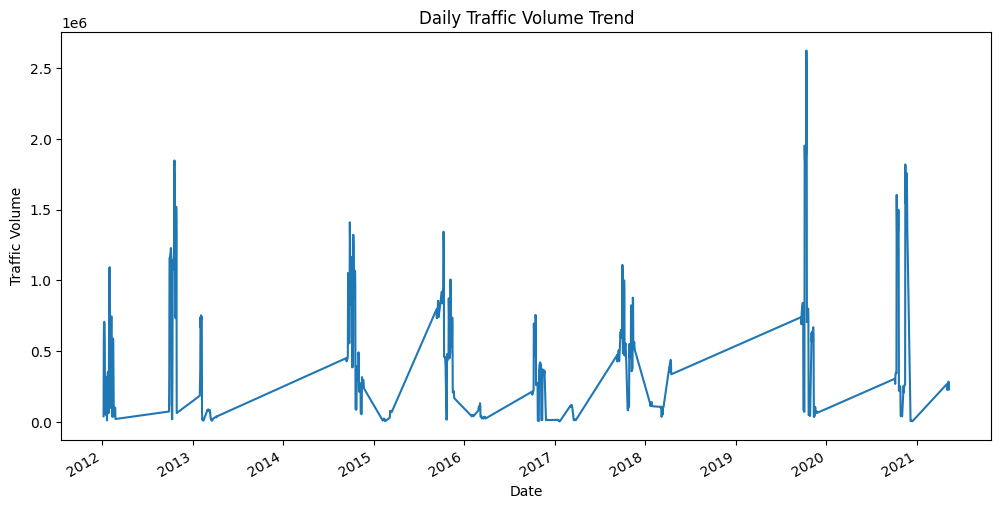

In [31]:
import matplotlib.pyplot as plt

daily_traffic = df_long.groupby('Date')['Traffic Volume'].sum()
daily_traffic.plot(figsize=(12,6), title="Daily Traffic Volume Trend", ylabel="Traffic Volume")
plt.show()


Saving Traffic_Volume_Counts_(Historical)_20260207.csv to Traffic_Volume_Counts_(Historical)_20260207 (1).csv
Columns in dataset: Index(['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')


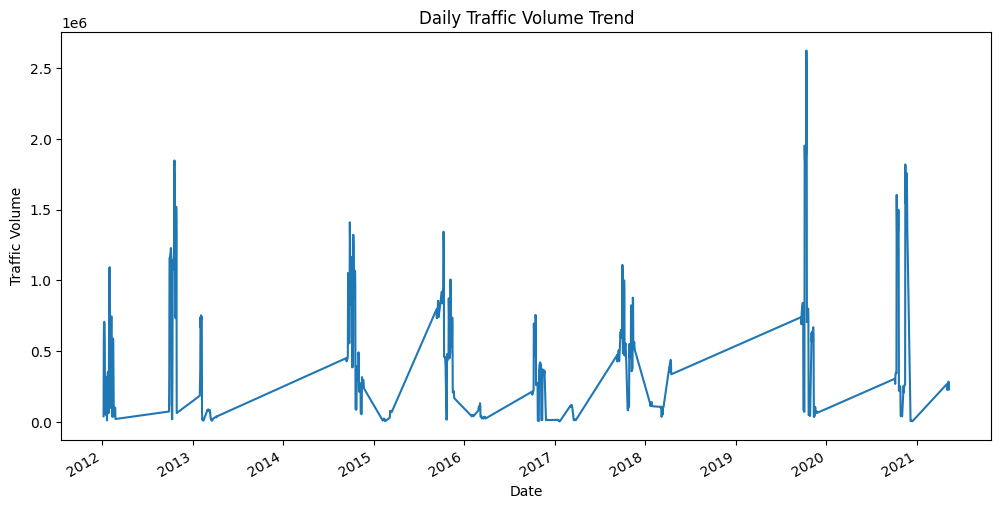

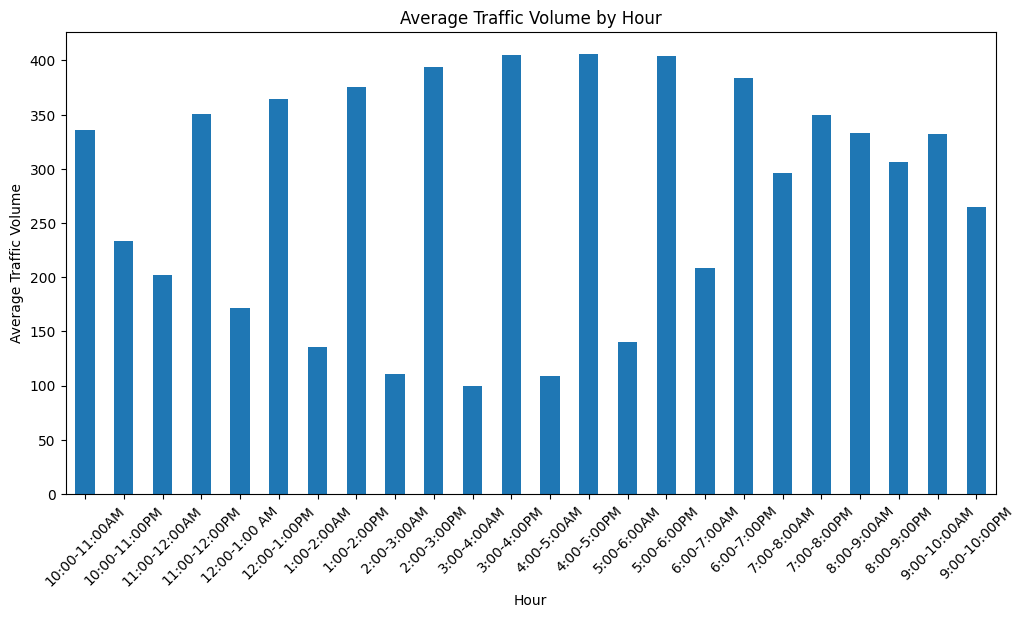

Top 10 Roadways by Total Traffic:
 Roadway Name
BROADWAY              3973125.0
Broadway              3530106.0
3 AVENUE              2192103.0
5 AVENUE              1488668.0
NORTHERN BOULEVARD    1405252.0
LINDEN BOULEVARD      1387912.0
Flatbush Avenue       1353204.0
ATLANTIC AVENUE       1351904.0
WEBSTER AVENUE        1218580.0
Northern Boulevard    1197437.0
Name: Traffic Volume, dtype: float64
Cleaned dataset exported as 'nyc_traffic_cleaned_long.csv'


In [32]:
!pip install pandas matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Columns in dataset:", df.columns)

hour_cols = df.columns[7:]  # Hourly traffic columns
df_long = df.melt(
    id_vars=['ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date'],
    value_vars=hour_cols,
    var_name='Hour',
    value_name='Traffic Volume'
)

df_long['Date'] = pd.to_datetime(df_long['Date'])

df_long['Traffic Volume'] = pd.to_numeric(df_long['Traffic Volume'], errors='coerce')
df_long = df_long.dropna(subset=['Traffic Volume'])

daily_traffic = df_long.groupby('Date')['Traffic Volume'].sum()
plt.figure(figsize=(12,6))
daily_traffic.plot(title="Daily Traffic Volume Trend")
plt.ylabel("Traffic Volume")
plt.xlabel("Date")
plt.show()

hourly_traffic = df_long.groupby('Hour')['Traffic Volume'].mean()
plt.figure(figsize=(12,6))
hourly_traffic.plot(kind='bar', title="Average Traffic Volume by Hour")
plt.ylabel("Average Traffic Volume")
plt.xlabel("Hour")
plt.xticks(rotation=45)
plt.show()

top_roads = df_long.groupby('Roadway Name')['Traffic Volume'].sum().sort_values(ascending=False).head(10)
print("Top 10 Roadways by Total Traffic:\n", top_roads)

df_long.to_csv("nyc_traffic_cleaned_long.csv", index=False)
print("Cleaned dataset exported as 'nyc_traffic_cleaned_long.csv'")


In [33]:
import plotly.express as px

fig = px.line(
    df_long.groupby('Date')['Traffic Volume'].sum().reset_index(),
    x='Date',
    y='Traffic Volume',
    title='Interactive Daily Traffic Volume Trend'
)
fig.show()


In [34]:
fig = px.bar(
    df_long.groupby('Hour')['Traffic Volume'].mean().reset_index(),
    x='Hour',
    y='Traffic Volume',
    title='Interactive Average Traffic Volume by Hour'
)
fig.show()
